In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv


In [2]:
df = pd.read_csv('../input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv',encoding='unicode_escape')
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.columns=df.columns.str.replace(' ',"_")

In [4]:
df.head(2)

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind_speed_(m/s)             0
Visibility_(10m)             0
Dew_point_temperature(°C)    0
Solar_Radiation_(MJ/m2)      0
Rainfall(mm)                 0
Snowfall_(cm)                0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64

In [6]:
df.value_counts()

Date        Rented_Bike_Count  Hour  Temperature(°C)  Humidity(%)  Wind_speed_(m/s)  Visibility_(10m)  Dew_point_temperature(°C)  Solar_Radiation_(MJ/m2)  Rainfall(mm)  Snowfall_(cm)  Seasons  Holiday     Functioning_Day
01/01/2018  61                 5     -4.4             54           0.8               1786              -12.3                      0.00                     0.0           0.0            Winter   Holiday     Yes                1
21/04/2018  707                0      16.3            59           0.2               756                8.2                       0.00                     0.0           0.0            Spring   No Holiday  Yes                1
            324                7      12.5            68           1.1               457                6.7                       0.22                     0.0           0.0            Spring   No Holiday  Yes                1
            436                2      14.7            63           1.8               611             

In [7]:
df['Rented_Bike_Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented_Bike_Count, Length: 2166, dtype: int64

In [8]:
df['Rented_Bike_Count'].max()

3556

In [9]:
df['Rented_Bike_Count'].min()

0

In [10]:
df['Rented_Bike_Count'].median()

504.5

In [11]:
def countsplit(df):
    for i in range (8760):
        if df.at[i,'Rented_Bike_Count']<400:
            df.at[i,'Rented_Bike_Count']=0
        elif df.at[i,'Rented_Bike_Count']>1000:
            df.at[i,'Rented_Bike_Count']=2
        else:
            df.at[i,'Rented_Bike_Count']=1
countsplit(df)

In [12]:
df['Rented_Bike_Count'].value_counts()

0    3902
1    2440
2    2418
Name: Rented_Bike_Count, dtype: int64

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Temperature(°C)'>

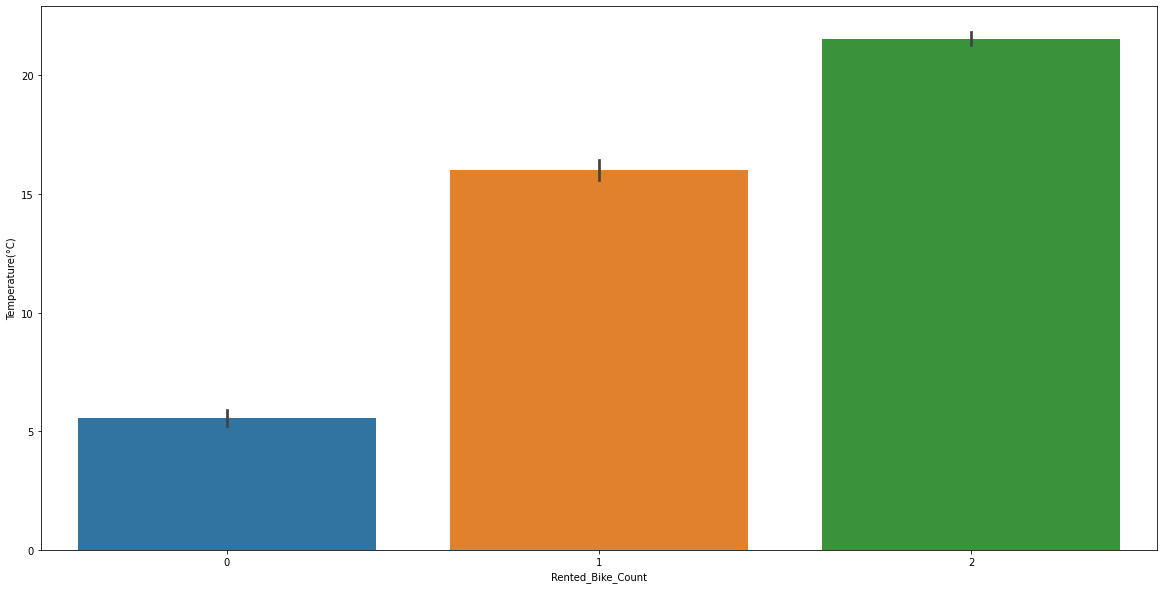

In [13]:
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Rented_Bike_Count',y='Temperature(°C)',data=df,ax=ax)

In [14]:
l = LabelEncoder()

In [15]:
df['Date']=l.fit_transform(df['Date'])
df['Seasons']=l.fit_transform(df['Seasons'])
df['Holiday']=l.fit_transform(df['Holiday'])
df['Functioning_Day']=l.fit_transform(df['Functioning_Day'])

In [16]:
x=df.drop(['Rented_Bike_Count'],axis=1)
y=df['Rented_Bike_Count']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

Random forest Classifier

In [19]:
rfc = RandomForestClassifier(n_estimators=200)

In [20]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [21]:
rfc.score(xtest,ytest)

0.8538812785388128

SVM

In [22]:
sv = SVC()

In [23]:
sv.fit(xtrain,ytrain)
sv.score(xtest,ytest)

0.785958904109589

In [24]:
"""model = GridSearchCV(sv,{
    'C':[0.1,0.4,0.8,1.0,2.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)"""

"model = GridSearchCV(sv,{\n    'C':[0.1,0.4,0.8,1.0,2.0],\n    'gamma':[0.1,0.4,0.8,1.0,2.0],\n    'kernel':['rbf','linear']\n},scoring='accuracy',cv=10)"

In [25]:
model.fit(xtrain,ytrain)
model.best_params_

NameError: name 'model' is not defined

In [ ]:
sv2 = SVC(C=0.2,gamma=0.8,kernel='linear')
sv2.fit(xtrain,ytrain)
sv2.score(xtest,ytest)

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)